
Project Instructions:
https://vlegalwaymayo.atu.ie/pluginfile.php/1804303/mod_resource/content/2/Project%20Description.pdf

Deadline: Monday 12th  January 2026 


Provisional Ideas

Magnificent 7 Stock Prices Analysis - yfinance



# Programming for Data Analytics Big Project 
## Magnificent 7 Stock Price Analysis


This assignment is an analysis of the well known **'Magnificent Seven'** technology companies that dominate the S&P 500 stock exchange. These are some of the largest technological companies in the world & have historically made up a significant percentage of the S&P 500 market capitalisation. [Magnificent 7 Stocks: What You Need To Know](https://www.investopedia.com/magnificent-seven-stocks-8402262)

| Company        | Ticker |
|---------------|--------|
| Meta Platforms | META   |
| Apple Inc.     | AAPL   |
| Amazon.com     | AMZN   |
| Tesla.Inc         | TSLA   |
| Alphabet Inc.  | GOOG   |
| Nvidia Corporation   | NVDA   | 
| Microsoft Corporation  | MSFT   |  

 
The goal of the assignment is to demonstrate tools learned in the module such as:  
**Data Acquisition** - Download/ acquire historical data to analyse. We will use **yfinance** to download historic stock data.    
    - **yfinance** is a python library that helps to access financial data (company stock prices etc) from Yahoo finance. [Reference: Geeksforgeeks](https://www.geeksforgeeks.org/machine-learning/what-is-yfinance-library/)    
**Data Cleaning & Normalisation** - Review & prepare the data prior to analysis.  
**Exploratory Analysis** - Look for trends /patterns in the data, visualise results & provide meaningful insights.

## Notebook Structure
  
Notebook structure follows below format:

- **1. Libraries Imported**  - Import packages used.
- **2. Data Acquisition** - **We use yfinance** to download the stock data.
- **3. Clean & Normalise Data**
- **3. Explore Data**
        - Resample (add plots)
        - Rolling Analysis (add plots)
        - Returns (Add plots)



thoughts

get weighting of mag7 in the s&p 500 MARKET CAP
look at % within their sectors maybe
ROLLING BALANCES  - BEST ONE ACROSS A QUARTER,YEAR - CALENDAR AND ROLLING YEAR MAYBE



## 1. Libraries Imported

Python libraries are used for the analysis:


- **datetime (`dt`)** – for working with dates and times.  
- **pandas (`pd`)** – for handling DataFrames.  
- **yfinance (`yf`)** – to download historical stock price data from Yahoo Finance.  
- **matplotlib.pyplot (`plt`)** – for plotting graphs.  
- **seaborn (`sns`)** – for statistical data visualization and styling.  
- **numpy (`np`)** – for numerical computations.  
- **os** – to manage folders and files in the directory.


In [2]:
# 1. Libraries Imported

# Dates & Times
import datetime as dt

# DataFrames and data manipulation
import pandas as pd

# Yahoo finance data.
import yfinance as yf

# Plotting graphs
import matplotlib.pyplot as plt

# Folder creation + listing files
import os

# Statistical data visualization
import seaborn as sns

# Numerical computing
import numpy as np



# Comments 2 - Data Acquisition

we will download the dataset from **yfinance** for the **'Magnificent Seven'** companies, from the **1st Jan 2014** to the **30th Nov 2025**.
Parameters from yfinance & additional commentary is provided below.

**delete later**
ii) download s&p 500  https://www.investing.com/academy/trading/what-is-the-sp-500/ & get %

Code is:

```python
df = yf.download("META AAPL AMZN TSLA GOOG NVDA MSFT", start="2014-01-01" ,end='2025-11-30',interval = '1d', group_by='ticker', auto_adjust=True)
```

**yfinance download parameters:**

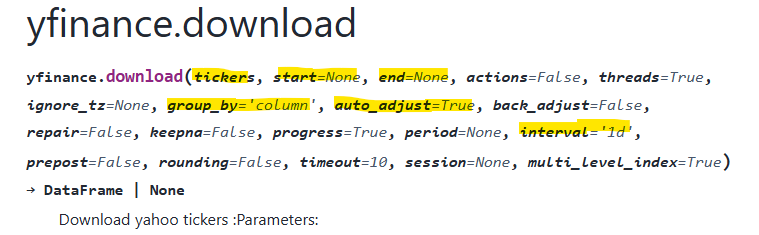


 - **tickers** - List the company tickers that we need to download pricing information for.
 - **start** - Set the start date - **2014-01-01** we wish to extract the pricing data from.
 - **end** - Set the end date - **2025-11-30** we wish to extract the pricing data from.
 - **interval** - Set the interval time period we want to pull the data from. This can be from 1 minute, hourly, daily up to 3 months - we will use daily pricing data **1d**.
 - **group_by** - Sets the order of the columns(headers) - we group the pricing information by **ticker** first and then by **column**, easier to extract pricing data for one ticker this way. If not stated default is to group by **column** only.
     - This gives a multi-index structure where we have two level headers:
         - Level 0 - Ticker type (META, AAPL, AMZN, TSLA, GOOG, NVDA, MSFT)
         - level 1 - Price type (Open,High,Low,Close,Volume)
 - **auto_adjust** - This automatically adjusts the pricing data to account for stock splits and dividends. Default if not stated is **True**


In [3]:
# Set up to download stock data for the Magnificent 7 companies from Yahoo Finance
   
df = yf.download("META AAPL AMZN TSLA GOOG NVDA MSFT", start="2014-01-01" ,end='2025-11-30',interval = '1d', group_by='ticker', auto_adjust=True)

# References:
# Yfinance Download -  https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html


[*********************100%***********************]  7 of 7 completed


# Comments 2 - Data Acquisition
In order to explore the data, we'll save the file to a csv folder, we will usa a placeholder for the file name.

In [4]:
# Comments 2 - Data Acquisition

# Set Filename
filename = "Magnificent 7 Stock Price History - Jan 2015- Nov 2025.csv"

# Save to CSV
df.to_csv(filename)

# Comment 3(i) - Initial Exploratory Analysis & Cleaning

We will perform an inital expxploratory analysis by viewing the first five rows **df.head()**, last five rows **df.tail()** & use **df.info** to show the index range, columns count & names - we also display non-null values & the datatype

- **df.head()** & **df.tail()** show a clear visual of MultiIndex structure - with level 0 **Ticker** (META, AAPL, MSFT,...) & level 1 **Price** (Open, High, Low,...) data shown.
    The data suggests a significant increase in adjusted prices between the opening five rows (early January 2014 pricing) and the last five rows (late November 2025 pricing).As an example, **Meta's** adjusted opening price on the 2nd January 2014 was **54.44 (rounded)** and had increased to **635.56 (rounded)** by the 28th November 2025.

- **df.info()** displays key information about the dataset:
    - Confirms a pandas DataFrame structure - **<class 'pandas.core.frame.DataFrame'>**
    - Confirms a DatetimeIndex with 2996 days of price data, ranging from January 2nd 2014 to 28th Novemeber 2025 - **DatetimeIndex: 2996 entries, 2014-01-02 to 2025-11-28**
    - Confirms 35 columns and the columns naming convention in a MultiIndex structure that we saw initially also using df.head() & df.tail()
    - Confirms non-null values with **Non-Null Count** & that our data types is floats & integers for pricing information.  

       **See image below with df.info() information for first two stocks shown.**

    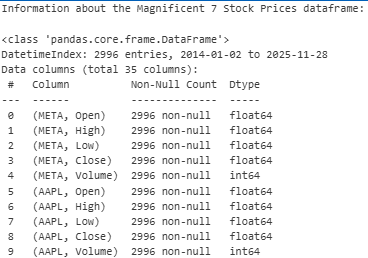


In [ ]:
# Comment 3 - Initial Exploratory Analysis & Cleaning

# Display the first 5 rows of the dataframe
print("First 5 rows of the Magnificent Seven Stock Prices dataframe:\n")
display(df.head())

# Display the first 5 rows of the dataframe
print("Last 5 rows of the Magnificent Seven Stock Prices dataframe:\n")
display(df.tail())

# Info about the dataframe
print("Information about the Magnificent Seven Stock Prices dataframe:\n")
df.info()


First 5 rows of the Magnificent 7 Stock Prices dataframe:



Ticker           TSLA                                                NVDA  \
Price            Open       High       Low      Close    Volume      Open   
Date                                                                        
2014-01-02   9.986667  10.165333  9.770000  10.006667  92826000  0.375278   
2014-01-03  10.000000  10.146000  9.906667   9.970667  70425000  0.374571   
2014-01-06  10.000000  10.026667  9.682667   9.800000  80416500  0.373157   
2014-01-07   9.841333  10.026667  9.683333   9.957333  75511500  0.378107   
2014-01-08   9.923333  10.246667  9.917333  10.085333  92448000  0.381879   

Ticker                                               ...       AAPL  \
Price           High       Low     Close     Volume  ...       Open   
Date                                                 ...              
2014-01-02  0.376693  0.370564  0.373864  260092000  ...  17.235795   
2014-01-03  0.375278  0.368207  0.369385  259332000  ...  17.148332   
2014-01-06  0.377164  0.369621  0.374335  409492000  ...  16.670349   
2014-01-07  0.381879  0.375514  0.380464  333288000  ...  16.883439   
2014-01-08  0.387536  0.380464  0.385650  308192000  ...  16.712533   

Ticker                                                       AMZN           \
Price            High        Low      Close     Volume       Open     High   
Date                                                                         
2014-01-02  17.277669  17.122271  17.156700  234684800  19.940001  19.9680   
2014-01-03  17.174386  16.762784  16.779844  392467600  19.914499  20.1355   
2014-01-06  16.960361  16.550931  16.871342  412610800  19.792500  19.8500   
2014-01-07  16.934307  16.684928  16.750685  317209200  19.752001  19.9235   
2014-01-08  16.921901  16.708813  16.856766  258529600  19.923500  20.1500   

Ticker                                      
Price             Low      Close    Volume  
Date                                        
2014-01-02  19.701000  19.898500  42756000  
2014-01-03  19.811001  19.822001  44204000  
2014-01-06  19.421000  19.681499  63412000  
2014-01-07  19.714500  19.901501  38320000  
2014-01-08  19.802000  20.096001  46330000  

[5 rows x 35 columns]

Last 5 rows of the Magnificent 7 Stock Prices dataframe:



Ticker            TSLA                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2025-11-21  402.320007  402.799988  383.760010  391.089996  100460600   
2025-11-24  402.170013  421.720001  401.089996  417.779999   96806400   
2025-11-25  414.420013  420.480011  405.950012  419.399994   71915600   
2025-11-26  423.950012  426.940002  416.890015  426.579987   63463000   
2025-11-28  426.589996  432.929993  426.200012  430.170013   36252900   

Ticker            NVDA                                                 ...  \
Price             Open        High         Low       Close     Volume  ...   
Date                                                                   ...   
2025-11-21  181.229910  184.549717  172.920360  178.870041  346926200  ...   
2025-11-24  179.480013  183.489785  176.470171  182.539841  256618300  ...   
2025-11-25  174.900263  178.150082  169.540561  177.810104  320600300  ...   
2025-11-26  181.619888  182.899816  178.230078  180.249954  183852000  ...   
2025-11-28  179.000025  179.280009  176.490171  176.990143  121332800  ...   

Ticker            AAPL                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-11-21  265.950012  273.329987  265.670013  271.489990  59030800   
2025-11-24  270.899994  277.000000  270.899994  275.920013  65585800   
2025-11-25  275.269989  280.380005  275.250000  276.970001  46914200   
2025-11-26  276.959991  279.529999  276.630005  277.549988  33431400   
2025-11-28  277.260010  279.000000  275.989990  278.850006  20135600   

Ticker            AMZN                                                
Price             Open        High         Low       Close    Volume  
Date                                                                  
2025-11-21  216.350006  222.210007  215.179993  220.690002  68490500  
2025-11-24  222.559998  227.330002  222.270004  226.279999  54318400  
2025-11-25  226.380005  230.520004  223.800003  229.669998  39379300  
2025-11-26  230.740005  231.750000  228.770004  229.160004  38497900  
2025-11-28  231.240005  233.289993  230.220001  233.220001  20292300  

[5 rows x 35 columns]

Information about the Magnificent 7 Stock Prices dataframe:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2996 entries, 2014-01-02 to 2025-11-28
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (TSLA, Open)    2996 non-null   float64
 1   (TSLA, High)    2996 non-null   float64
 2   (TSLA, Low)     2996 non-null   float64
 3   (TSLA, Close)   2996 non-null   float64
 4   (TSLA, Volume)  2996 non-null   int64  
 5   (NVDA, Open)    2996 non-null   float64
 6   (NVDA, High)    2996 non-null   float64
 7   (NVDA, Low)     2996 non-null   float64
 8   (NVDA, Close)   2996 non-null   float64
 9   (NVDA, Volume)  2996 non-null   int64  
 10  (GOOG, Open)    2996 non-null   float64
 11  (GOOG, High)    2996 non-null   float64
 12  (GOOG, Low)     2996 non-null   float64
 13  (GOOG, Close)   2996 non-null   float64
 14  (GOOG, Volume)  2996 non-null   int64  
 15  (MSFT, Open)    2996 non-null   float64
 16 

## Comment 3 (ii) - Initial Exploratory Analysis & Cleaning

**df.isnull().sum()** is also used to confirm if missing null values present.This checks each column for null entries & returns the count. This method focuses purely on identifying missing data and can be used in conjunction with **df.info()** which is more a high-level overview of all key information.
We see 0 returned which gives us confidence to proceed with further analysis of the dataset.
It was expected that no non-null values would be present - yfinance excludes non-trading days - it is still important to verify the dataset before proceeding with further analysis as this may not always be the case with other datasets.

References:
Pandas isnull() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html
Pandas sum() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html

In [ ]:
# Comment 3 - Initial Exploratory Analysis & Cleaning

# check for null values
df.isnull().sum()
# There are no null values in the dataframe


Ticker  Price 
TSLA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
NVDA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
MSFT    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
META    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AMZN    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

# Comment 4 - Price Analysis (Closing Prices)

We will now perform an initial analysis of the closing price data for the 'Magnificent Seven' stocks. To do this, we extract the closing prices from our DataFrame and assign this to a new variable **closing_prices**. 

Assigning the data to a variable rather than referencing individual stock tickers directly is good practice, as this allows us to easily expand/amend the stock ticker company information that we wish to analyse.

As we have a MultiIndex DataFrame [Reference- Pandas MultiIndexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-multiindexing) we cannot directly access the closing prices using **df['Close']**
We will use **df.xs()** -  this allows us to return a specified section of the DataFrame - [Reference: W3 schools. xs() Method](https://www.w3schools.com/python/pandas/ref_df_xs.asp)

i) We extract the 'Close' price from the DataFrame.

```python
# Get closing prices only from multiindex dataframe
closing_prices= df.xs('Close', level=1, axis=1) 

# Display the first 5 rows of the dataframe
print("First 5 rows of the Magnificent 7 Closing Prices dataframe:\n")
closing_prices.head()
```
We use **closing_prices.head()** to verfiy the columns are as expected which they are as multi-index has been flattened.

In [19]:
# # Comment 4 - Price Analysis (Closing Prices)


# Get closing prices only from multiindex dataframe
closing_prices= df.xs('Close', level=1, axis=1) 

# Display the first 5 rows of the dataframe
print("First 5 rows of the Magnificent 7 Closing Prices dataframe:\n")
closing_prices.head()                              
                                                                                

First 5 rows of the Magnificent 7 Closing Prices dataframe:



Ticker,TSLA,NVDA,GOOG,MSFT,META,AAPL,AMZN
Date,,,,,,,
2014-01-02,10.006667,0.373864,27.517696,30.831137,54.330486,17.156700,19.898500
2014-01-03,9.970667,0.369385,27.316959,30.623720,54.181522,16.779844,19.822001
2014-01-06,9.800000,0.374335,27.621525,29.976551,56.803215,16.871342,19.681499
2014-01-07,9.957333,0.380464,28.154018,30.208864,57.518211,16.750685,19.901501
2014-01-08,10.085333,0.385650,28.212610,29.669565,57.826065,16.856766,20.096001


# # Comment 4 - Price Analysis (Closing Prices)

ii)
We will now plot the closing prices for the seven stocks across the time horizon January 2014 - November 2025 to see the price movements.

### **Analysis**
This plot shows that all seven stocks have had long term growth over the period (**January 2014 to November 2025**). 
Due to different pricing levels for each stock it is difficult to directly compare performance on a price basis alone. From the plot, **Meta** has the highest price but not necessarily the highest growth across the period which is what investors would look to when analysing a stocks performance.

In the floowing steps, We will **re-sample the data** to monthly, quarterly & yearly samples to calculate **stock percentage returns**, and **re-indexing the price series** to allow a more accurate comparison across the companies.

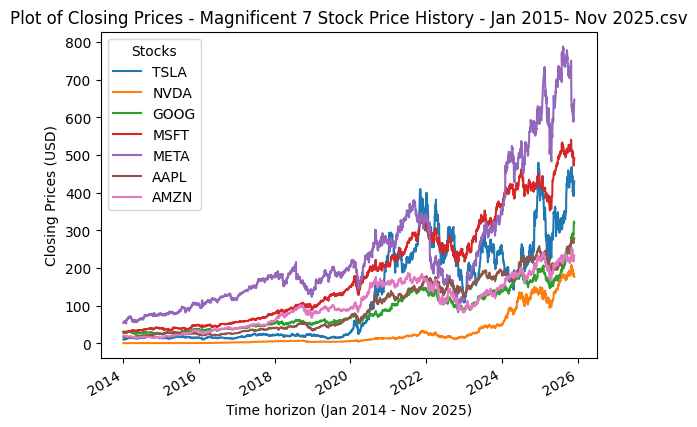

In [8]:
# Comment 4 - Price Analysis (Closing Prices)

#Create new figure and axis
fig, ax = plt.subplots()                                                            # References: Matplotlib subplots - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Plot closing prices
closing_prices.plot(ax=ax)

# Labels xlabel and ylabel
ax.set_xlabel("Time horizon (Jan 2014 - Nov 2025)")
ax.set_ylabel("Closing Prices (USD)")

#Title
ax.set_title(f"Plot of Closing Prices - {filename}" )

#Legend
ax.legend(title="Stocks", loc="best")

# Show plot
plt.show()


# Comment 5 - Resampling & returns Analysis

Thus far, we have looked at the daily prices of the Magnificent Seven stocks but financial performance, particularly for hedge funds and asset managers, is typically reported to investors on a monthly, quarterly or yearly basis rather than daily. We will **re-sample** the daily data to monthly, quarterly & yearly frequencies so we can further analyse. This more closely reflects a real-world financial reporting scenario (e.g a hedge fund) & this frequency reduces the noise from daily fluctuations on the stock and allows investors to see the rate of return (ROR) month on month.

We will now:

1. Resample the data to Monthly, Quarterly & Yearly samples from our initial Dataframe downloaded
2. Extract the closing prices only once the data is re-sampled
3. Caclculate the rate of return/stock percentage return across the different samples to give a more accurate comparsion.

## Step 1 - Resample data

**Pandas resampling**  allows us to customise the time periods for our data into smaller time periods - we will convert the data from daily to (i) **Monthly (month-end prices)** ; (ii) **Quarterly (quarter-end prices)** ; (iii) **Yearly (year-end prices)**. [Reference: pandas - resampling](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)


See below:

```python
# Resample - Daily to Month/Quarter/Year End pricing
month_end_pricing = df.resample('BME').last()                   
quarter_end_pricing = df.resample('BQE').last() 
yearly_end_pricing = df.resample('BYE').last() 
```
 - **BME/BQE/BYE** is used to group the rows into monthly/quarterly/yearly data. **'B'** represents **Business**, this is applied to Month/Quarter/Yearly End
 - **.last()** is used to select the final prices in the resampled grouped period(s) (monthly/quarterly/yearly)


## Step 2 - Extract Closing Prices only from resampled data

Our data is now grouped as per the above resampled period (**Step 1**), we are displaying **Open, High, Low, Close, Volume** pricing data grouped per each applicable stock.
We now want to extract **Close** pricing information for each stock.
We use the resampled data for the periods (monthly/quarterly/yearly) to now extract the **Close** price only using **.xs**. This allows us to return a specified section of the dataframe - [Reference: W3 schools. xs() Method](https://www.w3schools.com/python/pandas/ref_df_xs.asp)


 - **'close'** - this is the key parameter we want **'close'**
 - **level=1** - give us access to the price column as it is a multi level index. level=0 would be the tickers.
 - ***axis=1** - points to the columns rather than the default=0 which is the rows. **'close'** is not present in the rows.

```python
# Get closing prices only of resampled data
monthly_close = month_end_pricing.xs('Close', level=1, axis=1)
quarterly_close = quarter_end_pricing.xs('Close', level=1, axis=1)
yearly_close = yearly_end_pricing.xs('Close', level=1, axis=1)
```


## Step 3 - Get % change of returns across the periods (closing prices)

Our data is now grouped with the closing prices only for our resampled periods. We will now get the percentage change between each period & the preious period.
Same code methodology is applied to monthly, quarterly & yearly figures -  **yearly code only detailed below**.

    a) 

 -**.pct_change** method  (https://www.w3schools.com/python/pandas/ref_df_pct_change.asp) is used to show the percentage change between each row - current row - and the previous row. This allows us to see increase/decrease in stock performance across the Month/Quarter/Yearly resampled closing price periods.
 - Variable is called **yearly_returns**
 -***100** - we multiply by 100 to convert to percentage terms from decimals as easier to view change in percentage terms , also mirrors real life scenario comparisons.

```python
# Yearly:
yearly_returns = yearly_close.pct_change()*100
```
    b)
We need to add code to account for the performance in 2014 as initally this will return **NaN** as there is no prior year to compare returns to using the **pct_change()** method, data would start from 2015 in that case.

 - **yearly_close.iloc[0]** - is the first year end closing price (YE 2014)
 - **closing_prices.iloc[0]** - is the first available daily closing price (2nd January 2014)
 - Take the ending/closing price **yearly_close.iloc[0]** from the opening year daily price  & divide by the daily close price **closing_prices.iloc[0]**. Subtract by 1 to get the decimal return of the stock in the year.
 - -**100** - we multiply by 100 to convert to % terms from decimals as easier to view change in % terms , also mirrors real life scenario comparisons.
  

```python
yearly_returns.iloc[0] = ((yearly_close.iloc[0] / closing_prices.iloc[0]) - 1) * 100            # Multiply by 100 as to get percentage returns - decimals hard to easily read
```
    c)

We assign updated code to the same varaiable **yearly_returns** & round the percenatge to two decimal places for easier readibility. Standard in hedge fund reporting is typically to two places.

```python
yearly_returns = yearly_returns.round(2)
```



These time horizons are how hedge funds performance & rate of return is presented in marketing materials to existing investors & prospective investors, allowing for easier comparison across the industry.


In [9]:
# Month end closing prices - standard in industry to use month end prices for analysis
# References:
# Pandas Resample - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# Pandas Offset Aliases - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

# Resample - Daily to Month/Quarter/Year End pricing
month_end_pricing = df.resample('BME').last()                   # Used Business month end(BME) rather than month end (ME) as stocks open on business days only, accounted for in yfinance data already
quarter_end_pricing = df.resample('BQE').last() 
yearly_end_pricing = df.resample('BYE').last()  


# Get closing prices only of resampled data
monthly_close = month_end_pricing.xs('Close', level=1, axis=1)
quarterly_close = quarter_end_pricing.xs('Close', level=1, axis=1)
yearly_close = yearly_end_pricing.xs('Close', level=1, axis=1)

# pct_change()= % change between current & previous row
# https://www.w3schools.com/python/pandas/ref_df_pct_change.asp

# Calculate Monthly/Quarterly/Yearly Returns
# Monthly:
monthly_returns = monthly_close.pct_change()*100                                       # Multiply by 100 as to get percentage returns - decimals hard to easily read
monthly_returns.iloc[0] = ((monthly_close.iloc[0] / closing_prices.iloc[0]) - 1)*100  # First month return calculation as pct_change() gives NaN for first row
monthly_returns = monthly_returns.round(2)                                              # Round to 2 decimal places for easier reading

# Quarterly:
quarterly_returns = quarterly_close.pct_change()*100
quarterly_returns.iloc[0] = ((quarterly_close.iloc[0] / closing_prices.iloc[0]) - 1) * 100
quarterly_returns = quarterly_returns.round(2)


# Yearly:
yearly_returns = yearly_close.pct_change()*100
yearly_returns.iloc[0] = ((yearly_close.iloc[0] / closing_prices.iloc[0]) - 1) * 100
yearly_returns = yearly_returns.round(2)



# Comment 5 - Resampling & returns Analysis

We use **.describe()** to analyse the results of the **monthly_returns** data. This provides key metrics like **mean, standard deviation, percentiles and more.** [Reference: geeksforgeeks](https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-describe-method/)

In [10]:
# Comment 5 - Resampling & returns Analysis

# Display summary statistics of monthly returns
monthly_returns.describe()

Ticker,TSLA,NVDA,GOOG,MSFT,META,AAPL,AMZN
count,143.000000,143.000000,143.000000,143.000000,143.00000,143.000000,143.000000
mean,4.054895,5.212448,1.973706,2.138182,2.20972,2.261958,2.106503
std,17.584627,12.960129,7.037217,6.123760,9.58238,7.721504,8.741707
min,-36.730000,-32.030000,-17.670000,-13.020000,-32.63000,-18.120000,-23.750000
25%,-7.485000,-2.600000,-2.080000,-1.485000,-3.61000,-3.295000,-4.210000
50%,0.850000,4.360000,1.820000,2.050000,1.76000,2.770000,2.150000
75%,12.635000,12.925000,6.645000,5.980000,8.16000,7.755000,7.485000
max,74.150000,38.540000,20.190000,19.630000,27.16000,21.660000,27.060000


## Comment 5 - Resampling & returns Analysis

We can see from the monthly summary statistices the below:

**mean** - This shows the average month on month return across the period ( Jan 1st 2014 - 30th Novemebr 2025)  
     - Monthly average returns are positive for all stocks, with range between 1.9% - 5.25%.  
     - **Nividia** has the highest monthly average return with a healthy 5.25% mean return  
     - **Google** has the lowest monthly average return with 1.94%  

**std** - This shows the **standard deviation** (how much the returns vary) across the period. Higher the more volatile(risky) the returns.
     - **Tesla (17.58%)** is the most volatile  & **Nvidia(12.99%)** is 2nd most volatile, then **Meta(9.56%)** 
     - **Microsoft(6.14%)** is the lowest/least volatile returns.  

**min** - This shows the biggest loss month on month.  
      - **Tesla (-36.73%)**, **Meta (-32.63%)** & **Nividia (-32.02%)** have seen the biggest month on month loss in the period.  
      - **Microsoft (-13.02%)** had the lowest % loss   
      - This is broadly consistent with stocks that had the highest & lowest standard deviation  

**25%** - This shows how many of the returns were in the lowest 25% quartile.  
     - **Tesla (-7.58%)**  - This means that 25% of months had returns below -7.58%
     
**50%** - This shows the median return of the stocks. Median counts the value in the middle & reduce low or high outliers in % returns.  
      - All stock had positive returns, **Nividia (4.93%)** being the highest  

**75%** - This shows how many of the returns were in the highest 25% quartile.  
      - **Nividia (13.04%)** & ***Tesla (12.16%)** had the highest %, 25% of months had returns above **13.04%** & **12.16%** respectively for each company.  

**max** - This shows the highest % return in the period.  
     - **Tesla (74.14%)** & **Nividia (38.54%)** had the largest rate of return.  
     - Other stocks performed strongly - **Microsoft (19.62%)** had the lowest growth. 

The **Tesla (74.14%)** max return is a massive outlier for a month on month increase. Upon investigation , this was a genuine monthly return and was due to pricing speculation after Tesla announced a 5-for-1 stock split in August 2020.[Tesla stock jump](https://www.cnbc.com/2020/08/31/apple-tesla-jump-as-stock-splits-take-effect.html?msockid=11017dd644a966b708f66faa45d66739)  
Stock split lowers the price of a single share - value of a share is reduced proportionately to the split - so that investors that were priced out of buying a single stock now may be able to trade the stock due to the reduced price.  

**Tesla** was shown to be the most volatile from the standard deviation of returns(17.58%). This can be seen by the stock leading the way with the biggest loss **(-36.73%)** and the highest return **(74.14%)** 
Investors with a high risk appetite might favour this stock while investors drawn to more stable returns might prefer **Microsoft** which had the lowest standard deviation **(6.14%)**; the lowest loss **(-13.02%)** & stable mean **(2.13%)** & median returns **(2.04%)**.


# Comment  6 - yearly returns ror



In [11]:
# Comment  6 - yearly returns ror

print("Year-on-Year Growth % of the Magnificent 7 Stocks")

# yearly_returns - rounded to 2 decimal places (statndard practice for reporting returns)
display(yearly_returns.round(2))


Year-on-Year Growth % of the Magnificent 7 Stocks


Ticker,TSLA,NVDA,GOOG,MSFT,META,AAPL,AMZN
Date,,,,,,,
2014-12-31,48.17,28.68,-5.32,28.42,42.61,42.63,-22.02
2015-12-31,7.91,67.12,44.56,22.69,34.15,-3.01,117.78
2016-12-30,-10.97,226.96,1.71,15.08,9.93,12.48,10.95
2017-12-29,45.70,81.99,35.58,40.73,53.38,48.46,55.96
2018-12-31,6.89,-30.82,-1.03,20.80,-25.71,-5.39,28.43
2019-12-31,25.70,76.94,29.10,57.56,56.57,88.96,23.03
2020-12-31,743.44,122.30,31.03,42.53,33.09,82.31,76.26
2021-12-31,49.76,125.48,65.17,52.48,23.13,34.65,2.38
2022-12-30,-65.03,-50.26,-38.67,-28.02,-64.22,-26.40,-49.62


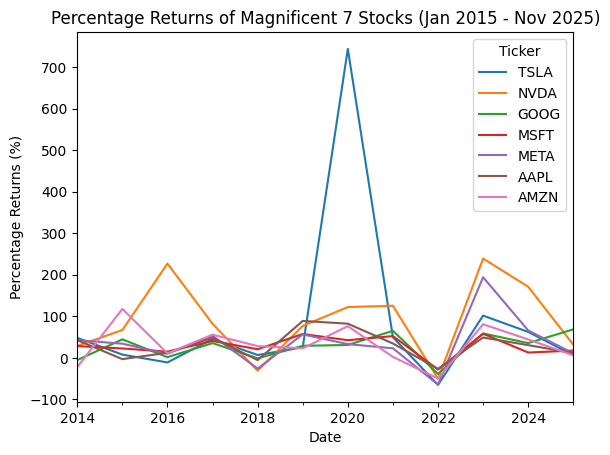

In [12]:
# Plot the percentage returns for each stock over the time period
yearly_returns.plot(title="Percentage Returns of Magnificent 7 Stocks (Jan 2015 - Nov 2025)", ylabel="Percentage Returns (%)", xlabel="Date")
plt.show()

# Comment 6 - 

We plot the percentage returns - visually clear Nividia have had massive growth but difficult to see growth of the other stocks relative to Nividia.

Re-index the intial value of all stocsk to 100 and then track growth from this to make easy comparison across the 7 stocks
reference: https://stackoverflow.com/questions/61128874/python-timeseries-normalize-scaling-to-base-100






<Figure size 1200x600 with 0 Axes>

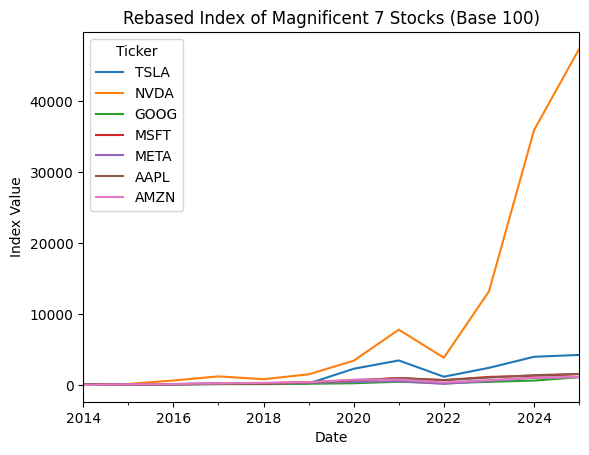

<Figure size 1200x600 with 0 Axes>

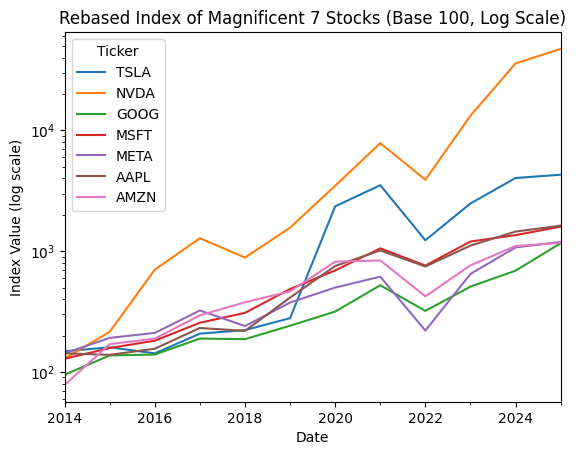

In [13]:
# Comment 6 - Rebased Index Analysis (Base 100)

# Rebase all stocks to 100 starting price & get cunmulative yearly returns
df_indexed_yearly = 100 * (1 + yearly_returns/100).cumprod()      #Reference: cumprod() function - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumprod.html

# Plot 
plt.figure(figsize=(12,6))
df_indexed_yearly.plot()
plt.title("Rebased Index of Magnificent 7 Stocks (Base 100)")
plt.ylabel("Index Value")
plt.xlabel("Date")
plt.show()

# Plot on log scale - code adapted from chatgpt for logscale plot - Reference: https://chatgpt.com/share/69542880-0d10-8005-95e2-76895301c68a
plt.figure(figsize=(12,6))
df_indexed_yearly.plot()
plt.yscale('log')                    # Set y-axis to log scale
plt.title("Rebased Index of Magnificent 7 Stocks (Base 100, Log Scale)")
plt.ylabel("Index Value (log scale)")
plt.xlabel("Date")
plt.legend(title="Ticker")
plt.show()




In [ ]:
# Comment 6 - Rebased Index Analysis (Base 100)

# See value of 100 investment at start date vs end date

initial_investment = 100


# Get a table that shows starting investment vs ending investment with % growth for each stock
# Code adapted with assistance from GitHub Copilot
investment_growth = pd.DataFrame({
    'Starting Investment ($)': [initial_investment]*len(df_indexed_yearly.columns),
    'Final Investment ($)': df_indexed_yearly.iloc[-1],           # Final Investment Value
    'Percentage Growth (%)': ((df_indexed_yearly.iloc[-1] - initial_investment) / initial_investment * 100)     
}, index=df_indexed_yearly.columns)


# Sort highest to lowest growth
investment_growth = investment_growth.sort_values(
    by='Percentage Growth (%)',
    ascending=False
)

# Display formatted table (presentation only)
investment_growth.style.format({
    'Starting Investment ($)': '${:,.0f}',
    'Final Investment ($)': '${:,.0f}',
    'Percentage Growth (%)': '{:,.0f}%'
})



,Starting Investment ($),Final Investment ($),Percentage Growth (%)
Ticker,,,
NVDA,$100,"$47,342","47,242%"
TSLA,$100,"$4,299","4,199%"
AAPL,$100,"$1,626","1,526%"
MSFT,$100,"$1,596","1,496%"
META,$100,"$1,192","1,092%"
AMZN,$100,"$1,172","1,072%"
GOOG,$100,"$1,163","1,063%"


## # Comment 6 - Rebased Index Analysis (Base 100)

After re-basing the stock prices to 100 & using yearly returns - to plot long term growth trend of the companies - to compare the growth of each of the companies rather than price movement. 
Re-indexing to 100 sets all the stocks to the same initial value 100 from the start of the dataset & allows us to analyse the cumulative growth of each stock year on year.

i) Rebased Index - Non Log Scale
**Nvidia** has had significantly more growth since 2014 compared to the other companies. Nvidia dominates the plot & it is difficult to interpret the results clearly for the other companies as they appear compressed due to the large scale of the plot 


ii) Rebased Index - Log Scale
To visually show a more meaningful plot we use a logarithmic scale. Log scales are used when there is a wide variation in range of values as it allows the values to be displayed without the very small or very large values to be compressed at either end of the plot - very large Nvidia value in our exampl - with equal vertical distances representing equal percentage changes. Adapted from [Logarithmic Axes with Matplotlib](https://towardsdatascience.com/plot-logarithmic-axes-matplotlib-python-bb8533f430c0/)
**Nvidia** has had consistent high growth since 2014, **Tesla** had strong growth, especially from 2019 onwards - both companies potentially being postivily impacted by macroeconomic factors like the COVID-19 lockdowns & the market correction in 2022 seems to affect all seven stocks.



 


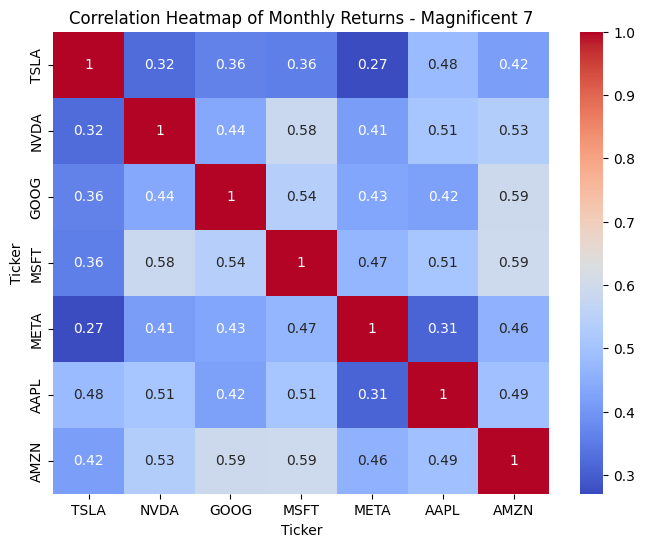

In [15]:
#Correlation between stocks based on monthly returns
correlation_matrix = monthly_returns.corr()

# Plot heatmap of correlation matrix                        Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap of Monthly Returns - Magnificent 7")
plt.show()
 

# 7 - Corrleaion between increase/decrease in volume if this has correlation to price momenet

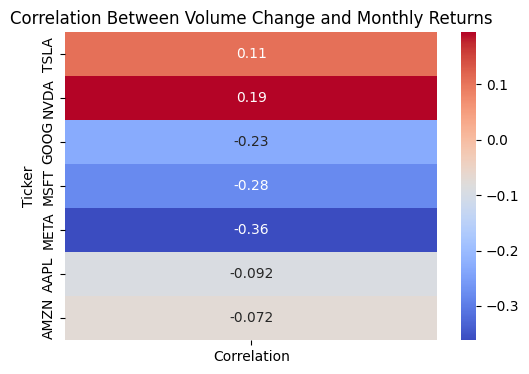

In [16]:
# Get trading volume
volume = df.xs('Volume', level=1, axis=1)

# Resample to monthly volume
monthly_volume = volume.resample('BME').sum()

# Percentage change in volume
volume_change = monthly_volume.pct_change() * 100



# Correlation between volume changes and returns
volume_price_corr = volume_change.corrwith(monthly_returns)

plt.figure(figsize=(6, 4))
sns.heatmap(
    volume_price_corr.to_frame(name="Correlation"),
    annot=True,
    cmap="coolwarm",
    
)
plt.title("Correlation Between Volume Change and Monthly Returns")
plt.show()

# 8 -  Add rolling balances

# 9 - 9 - Linear Regression on Apple Stock Prices

We will narrow our focus to one stock - Apple -  & use linear regression to see if past Apple closing prices can be a predictor of future Apple closing prices. While in reality past prices are not a predictor of future prices (this disclaimer is present in hedge fund marketing materials) - we can test this by doing the below.

1. Get Apple closing price
Assign apple stock closing price to it's own dataframe using **.copy** & re-name the column to **'Close'** as it was multi-indexed.

```python
# 1. Extract Apple closing prices into a simple DataFrame
aapl = df[[('AAPL', 'Close')]].copy()
aapl.columns = ['Close']   # flatten MultiIndex
```

2. Assign x & y variables
x is time index ( one day per step)
y is the Apple closing price on each day

```python
# 2. Create X (time index) and y (price)
X = np.arange(len(aapl)).reshape(-1, 1)
y = aapl['Close'].values
```

3. Train/test split of data

We assign a variable **'split'** and divide the data between **training(first 80%)** and **testing (last 20%)**


```python
# 3. Time-based split (80/20)
split = int(len(aapl) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
```

4. Fit Linear Regression estimator
We fit a linear regression model to the training data to estimate a linear trend.


```python
# 4. Fit Linear Regression estimator
model = LinearRegression()
model.fit(X_train, y_train)
```


5. Evaluate
We calculate the Coefficient of determination, denoted as r2 - tells us which amount of variation in y (Apple closing prices) can be explained by the dependence on x (time-index) using the linera regression model.
High R² (close to 1) indicates near perfect fit while low or negative indicates poor fit for predicting future prices.

```python
# 5.Evaluate
r2 = model.score(X_test, y_test)
print(f"R² score on test data: {r2:.3f}")
```


Reference: Linear regression -https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/


In [17]:
# 9 - Linear Regression on Apple Stock Prices

from sklearn.linear_model import LinearRegression

#Adapted code from lecture notes , Github Copilot & https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/ 


# 1. Extract Apple closing prices into a simple DataFrame
aapl = df[[('AAPL', 'Close')]].copy()
aapl.columns = ['Close']   # flatten MultiIndex

# 2. Create X (time index) and y (price)
X = np.arange(len(aapl)).reshape(-1, 1)
y = aapl['Close'].values

# 3. Time-based split (80/20)
split = int(len(aapl) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# 4. Fit Linear Regression estimator
model = LinearRegression()
model.fit(X_train, y_train)

# 5.Evaluate
r2 = model.score(X_test, y_test)
print(f"R² score on test data: {r2:.3f}")

       


R² score on test data: -1.189


9 - Linear Regression on Apple Stock Prices - Analysis

The R² score of -1.189 indicates that past performance of Apple stock prices is a poor predictor of future prices. This is expected because price movements are influenced by a wide range of factors, including macroeconomic events (taxes, tariffs, interest rates), company performance (sales numbers, new product launches), and unforeseen “black swan” events such as the COVID-19 pandemic. The negative R² also reflects the high volatility in a stock’s daily closing price and shows that a simple linear trend cannot capture these fluctuations.

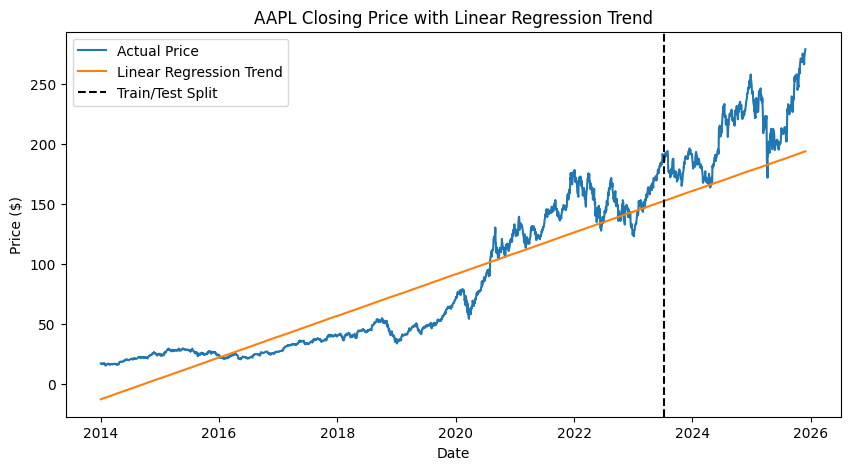

In [18]:
#Adapted code from Chatgpt to improve visualisation of linear regression results
#Reference: For existing code what is best plot to assist with visualising? -  https://chatgpt.com/share/69579f4a-87f8-8005-8de6-e2ef11a4dbb1

# Predict prices for all dates
y_pred = model.predict(X)

# Plot actual prices and regression line
plt.figure(figsize=(10, 5))
plt.plot(aapl.index, y, label='Actual Price')
plt.plot(aapl.index, y_pred, label='Linear Regression Trend')

# Mark train/test split
plt.axvline(aapl.index[split], color='black', linestyle='--', label='Train/Test Split')

plt.title('AAPL Closing Price with Linear Regression Trend')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()